In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import requests
import json
import time
import datetime

from random import randint
from math import exp

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import datetime

In [3]:
data_test = pd.read_csv('./Data/test.csv')

## EDA Weather

In [4]:
data_weather = pd.read_csv('./Data/weather.csv')

In [13]:
data_weather.Date.min()

'2007-05-01'

In [14]:
data_weather.Date.max()

'2014-10-31'

In [15]:
data_weather['weather_day'] = 1

In [16]:
weather_station_1 = data_weather.loc[data_weather.Station==1, :]
weather_station_2 = data_weather.loc[data_weather.Station==2, :]
weather_station_1.drop('Station', axis=1, inplace=True)
weather_station_2.drop('Station', axis=1, inplace=True)
weather_station_1.Date = pd.to_datetime(weather_station_1.Date)
weather_station_2.Date = pd.to_datetime(weather_station_2.Date);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
weather_station_1['Tavg'] = weather_station_1['Tavg'].astype('float64');
weather_station_1.drop('Depart', axis=1, inplace=True);
weather_station_1['PrecipTotal'] = weather_station_1['PrecipTotal'].map(lambda x: .001 if x=='  T' else x).astype(float);
weather_station_1['SnowFall'] = weather_station_1['SnowFall'].map(lambda x: .001 if x=='  T' else x).astype(float);
weather_station_1.drop('Water1', axis=1, inplace=True);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [18]:
templist = [element for element in weather_station_1['CodeSum'].str.split(' ').tolist()]
newl = []
for element in templist:
    for subelement in element:
        newl.append(subelement)
Codes_list = list(set(newl))
Codes_list.pop(0)
for code in Codes_list:
    weather_station_1[code] = weather_station_1['CodeSum'].str.contains(code)*1
weather_station_1.drop('CodeSum', axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
#Recheck this


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
stnpressure_mean = weather_station_1[weather_station_1['StnPressure']!='M']['StnPressure'].astype(float).mean()
sealevel_mean = weather_station_1[weather_station_1['SeaLevel']!='M']['SeaLevel'].astype(float).mean()
wetbulb_mean = weather_station_1[weather_station_1['WetBulb']!='M']['WetBulb'].astype(float).mean()

weather_station_1['StnPressure'] = weather_station_1['StnPressure'].map(lambda x: stnpressure_mean if x=='M' else x).astype(float);
weather_station_1['SeaLevel'] = weather_station_1['SeaLevel'].map(lambda x: sealevel_mean if x=='M' else x).astype(float);
weather_station_1['WetBulb'] = weather_station_1['WetBulb'].map(lambda x: wetbulb_mean if x=='M' else x).astype(float);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
obj_cols = [col for col in weather_station_1.columns if weather_station_1[col].dtype=='object']
for col in weather_station_1:
    if col in obj_cols:
        weather_station_1[col] = weather_station_1[col].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## EDA Train

In [10]:
data_train = pd.read_csv('./Data/train.csv')

In [11]:
data_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [12]:
#model baseline
data_train.WnvPresent.mean()

0.05244622120692937

In [13]:
temp = pd.to_datetime(data_train.Date).dt.month

Address, Street, Trap, Lat & Long are all the same

## Combine Data

In [14]:
df = pd.concat([data_train, data_weather], ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [15]:
df['weather_day'].fillna(0,  inplace=True)

In [16]:
df['Month'] = pd.to_datetime(df.Date).dt.month

In [17]:
df['Year'] = pd.to_datetime(df.Date).dt.year

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
BeginDate = datetime.date(2007, 4, 30)
temp = (df['Date']-pd.Timestamp(BeginDate)).astype(str)
df['DateFrom'] = temp.map(lambda x: x.replace(' days 00:00:00.000000000', '')).astype(int)

In [67]:
df['MonthsFrom'] = (df['DateFrom']/30.5).astype(int)

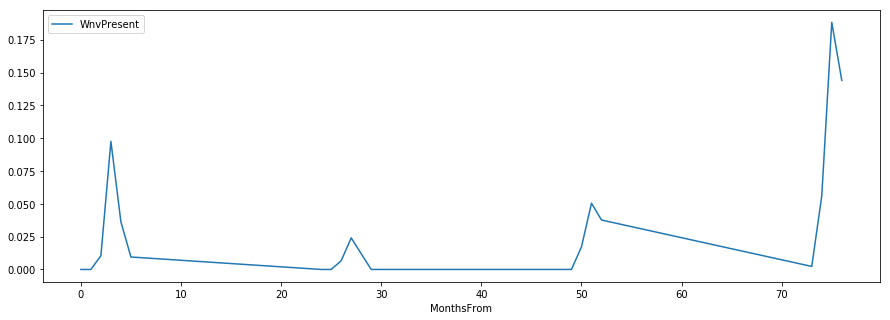

In [77]:
fig, axes = plt.subplots(figsize=(15,5))
df.groupby('MonthsFrom').mean().loc[:, ['WnvPresent']].dropna().plot(ax=axes)

## Feature Engineering

In [19]:
df_traps = pd.get_dummies(df['Trap'])
df_traps.columns

Index(['T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007', 'T008', 'T009',
       'T011',
       ...
       'T230', 'T231', 'T232', 'T233', 'T235', 'T236', 'T237', 'T238', 'T900',
       'T903'],
      dtype='object', length=136)

In [20]:
df = pd.concat([df, df_traps], axis=1)

In [87]:
df.shape

(13450, 171)

In [20]:
df_blocks = pd.get_dummies(df['Block'])

In [133]:
df = pd.concat([df, df_blocks], axis=1)

In [142]:
df.shape

(13450, 99)

## Model

In [21]:
from sklearn.cluster import KMeans
import operator

In [22]:
model_cols = ['Latitude', 'Longitude', 'Month', 'WnvPresent']

In [49]:
df_formodel = df.loc[:, model_cols].dropna()

In [50]:
checkn = 20
kmm=KMeans(n_clusters=checkn, random_state=42)
kmm.fit(df_formodel)
k_means_list = [kmm.cluster_centers_[i][len(model_cols)-1] for i in range(checkn)]

k_means_dict = {}
for i in range(len(k_means_list)):
    k_means_dict[i] = k_means_list[i]
sorted_x = sorted(k_means_dict.items(), key=operator.itemgetter(1))
sorted_x

[(11, 0.0),
 (1, 8.326672684688674e-17),
 (19, 2.42861286636753e-16),
 (17, 3.2612801348363973e-16),
 (18, 3.677613769070831e-16),
 (2, 4.0245584642661925e-16),
 (8, 4.2327252813834093e-16),
 (9, 4.3021142204224816e-16),
 (15, 5.828670879282072e-16),
 (13, 6.106226635438361e-16),
 (16, 6.314393452555578e-16),
 (0, 6.453171330633722e-16),
 (14, 7.771561172376096e-16),
 (7, 8.673617379884035e-16),
 (3, 0.0017182130584197583),
 (5, 0.007246376811594159),
 (4, 0.9999999999999966),
 (10, 0.9999999999999966),
 (6, 0.9999999999999978),
 (12, 1.0000000000000007)]

## Alt Predict

In [51]:
pd.DataFrame(kmm.cluster_centers_, columns=['Latitude', 'Longitude', 'Month', 'Probability'], index=range(20)).to_csv('./Data/Clusters.csv')

In [53]:
print('    ', kmm.cluster_centers_[10])
print('    ', kmm.cluster_centers_[6])
print('    ', kmm.cluster_centers_[12])

     [ 41.73564292 -87.63850959   8.           1.        ]
     [ 41.87674538 -87.74085466   9.           1.        ]
     [ 41.85670015 -87.73698465   7.           1.        ]


In [54]:
print('    ', kmm.cluster_centers_[11])
print('    ', kmm.cluster_centers_[1])
print('    ', kmm.cluster_centers_[19])

     [ 41.84332287 -87.68844375   5.           0.        ]
     [ 4.17096556e+01 -8.76022197e+01  8.00000000e+00  8.32667268e-17]
     [ 4.19650685e+01 -8.78365324e+01  9.00000000e+00  2.42861287e-16]


In [55]:
kmm.cluster_centers_

array([[ 4.19182770e+01, -8.76871144e+01,  7.00000000e+00,
         6.45317133e-16],
       [ 4.17096556e+01, -8.76022197e+01,  8.00000000e+00,
         8.32667268e-17],
       [ 4.19361463e+01, -8.76960368e+01,  9.00000000e+00,
         4.02455846e-16],
       [ 4.17404909e+01, -8.76563381e+01,  6.00000000e+00,
         1.71821306e-03],
       [ 4.19600423e+01, -8.77969486e+01,  8.00000000e+00,
         1.00000000e+00],
       [ 4.18376690e+01, -8.76925524e+01,  1.00000000e+01,
         7.24637681e-03],
       [ 4.18767454e+01, -8.77408547e+01,  9.00000000e+00,
         1.00000000e+00],
       [ 4.18426408e+01, -8.76921949e+01,  8.00000000e+00,
         8.67361738e-16],
       [ 4.19209598e+01, -8.76937987e+01,  6.00000000e+00,
         4.23272528e-16],
       [ 4.17115342e+01, -8.75774875e+01,  7.00000000e+00,
         4.30211422e-16],
       [ 4.17356429e+01, -8.76385096e+01,  8.00000000e+00,
         1.00000000e+00],
       [ 4.18433229e+01, -8.76884438e+01,  5.00000000e+00,
      

## Assess

In [182]:
from sklearn.metrics import confusion_matrix

In [25]:
df_residuals = df_formodel

df_residuals['class_pred'] = kmm.predict(df_formodel)

df_residuals['rate_pred'] =df_residuals['class_pred'].map(k_means_dict)

df_residuals['Prediction'] =1*( df_residuals['rate_pred']>.2)

In [26]:
cm = confusion_matrix(df_residuals['WnvPresent'], df_residuals['Prediction'])
df_cm = pd.DataFrame(cm, columns=['Predicted 0', 'Pred 1'], index=['Actual 0', 'Actual 1'])

print('   Accurate Predictions', df_cm.iloc[1][1] / (df_cm.iloc[1][1] +df_cm.iloc[0][1]) )
print('   % Identified', df_cm.iloc[1][1] / (df_cm.iloc[1][0]+df_cm.iloc[1][1]) )
df_cm

   Accurate Predictions 1.0
   % Identified 0.9945553539019963


,Predicted 0,Pred 1
Actual 0,9955,0
Actual 1,3,548


In [185]:
df_residuals['class_pred'].value_counts().sort_index()

0      703
1     1390
2      507
3      582
4      189
5      276
6      125
7     1095
8      521
9      523
10     188
11      84
12      46
13     671
14     889
15     642
16     692
17     468
18     487
19     428
Name: class_pred, dtype: int64

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
KNC = KNeighborsClassifier(n_neighbors=20)

In [253]:
X = df.loc[:, [i for i in model_cols if i != 'WnvPresent']].dropna()

In [263]:
y = kmm.predict(df_formodel)

In [265]:
KNC.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [262]:
KNC.score(X,y)

0.9475537787930707

## Fit to Test

In [215]:
df_predictions = data_test

In [216]:
df_predictions['Month'] = pd.to_datetime(df_predictions.Date).dt.month

In [217]:
df_predictions['Year'] = pd.to_datetime(df_predictions.Date).dt.year

In [218]:
df_predictions['Date'] = pd.to_datetime(df_predictions['Date'])
temp = (df_predictions['Date']-pd.Timestamp(BeginDate)).astype(str)
df_predictions['DateFrom'] = temp.map(lambda x: x.replace(' days 00:00:00.000000000', '')).astype(int)

In [222]:
model_cols.pop(3)

'Id'

In [223]:
predic_cols = model_cols

In [224]:
predic_cols

['Latitude', 'Longitude', 'Month']

In [225]:
df_predictions = df_predictions[predic_cols]

In [267]:
KNC.predict(df_predictions)

array([17, 17, 17, ...,  5,  5,  5])

In [268]:
df_residuals = df_predictions

df_residuals['class_pred'] = KNC.predict(df_predictions)

df_residuals['rate_pred'] =df_residuals['class_pred'].map(k_means_dict)

df_residuals['Prediction'] =1*( df_residuals['rate_pred']>.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [277]:
df_residuals[df_residuals['class_pred']==4]

,Latitude,Longitude,Month,class_pred,rate_pred,Prediction
